Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None

Sample of the data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0      

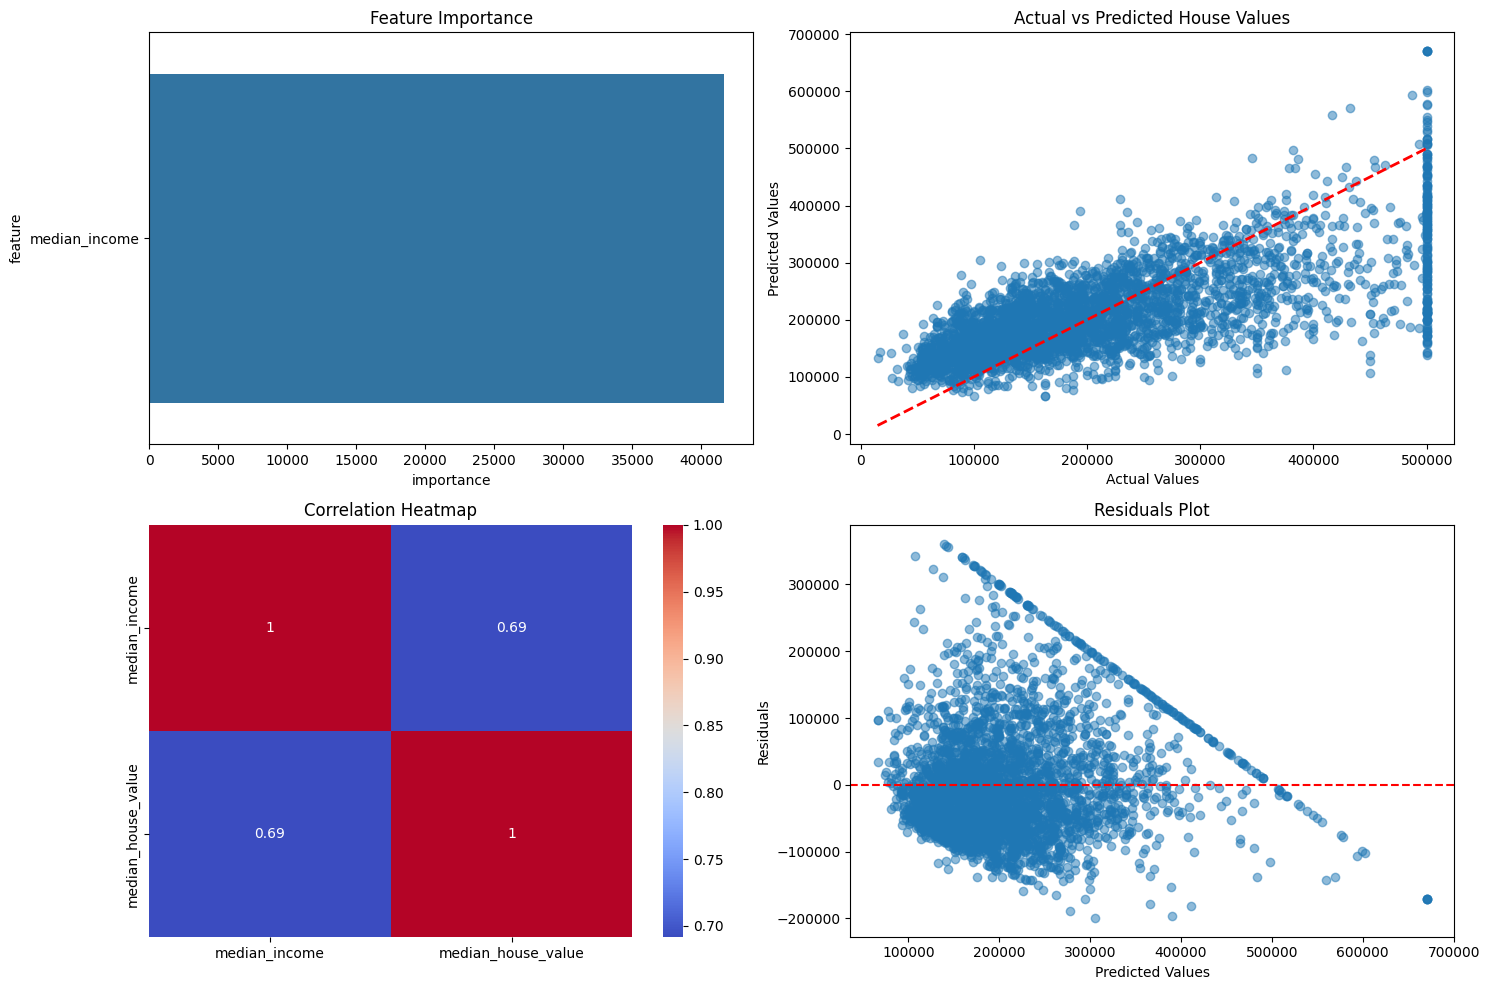

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Read the data
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nSample of the data:")
print(df.head())

# Check correlation with target variable
correlations = df.corr()['median_house_value'].sort_values(ascending=False)
print("\nCorrelations with median_house_value:")
print(correlations)

# Select features with significant correlation
threshold = 0.3
relevant_features = correlations[abs(correlations) > threshold].index.tolist()
relevant_features.remove('median_house_value')  # Remove target variable

# Prepare X (features) and y (target)
X = df[relevant_features]
y = df['median_house_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nR2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# Create visualizations
plt.figure(figsize=(15, 10))

# 1. Feature importance plot
plt.subplot(2, 2, 1)
feature_importance = pd.DataFrame({
    'feature': relevant_features,
    'importance': abs(model.coef_)
})
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')

# 2. Actual vs Predicted values
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values')

# 3. Correlation heatmap
plt.subplot(2, 2, 3)
sns.heatmap(df[relevant_features + ['median_house_value']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# 4. Residuals plot
plt.subplot(2, 2, 4)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()